In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


<h3>1.Find out how many males and females participated in the test</h3>

In [5]:
gender_counts = df["gender"].value_counts()
print(gender_counts)

female    518
male      482
Name: gender, dtype: int64


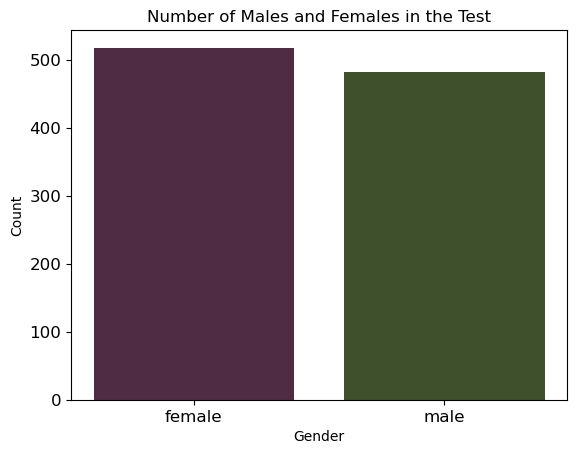

In [6]:
plt.bar(gender_counts.index, gender_counts.values,color=["#502C44", "#3F502C"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Males and Females in the Test")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<h3>2.What do you think about the students' parental level of education?</h3>

In [7]:
parental_education_counts = df["parental level of education"].value_counts()

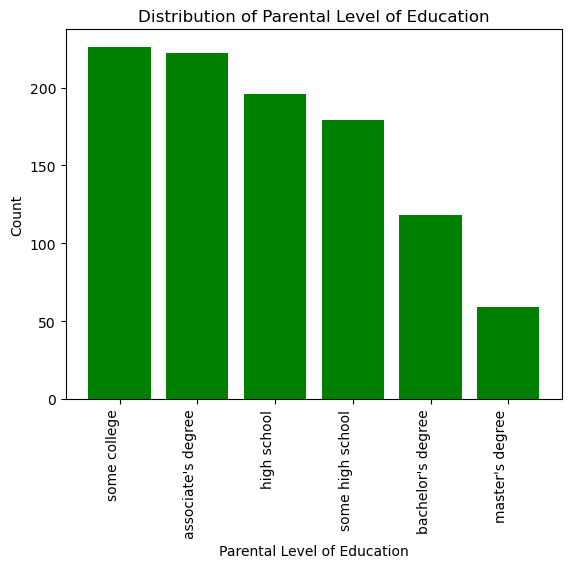

In [8]:
plt.bar(parental_education_counts.index, parental_education_counts.values, color="green")
plt.xlabel("Parental Level of Education")
plt.ylabel("Count")
plt.title("Distribution of Parental Level of Education")
plt.xticks(rotation=90, ha="right")
plt.show()

<h3>3.Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course</h3>

In [9]:
import statistics

In [10]:
average_scores = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].mean()

In [11]:
highest_math_score = average_scores["math score"].idxmax()
highest_reading_score = average_scores["reading score"].idxmax()
highest_writing_score = average_scores["writing score"].idxmax()

In [12]:
print(f"Highest Average Math Score: {highest_math_score}")
print(f"Highest Average Reading Score: {highest_reading_score}")
print(f"Highest Average Writing Score: {highest_writing_score}")

Highest Average Math Score: ('male', 'completed')
Highest Average Reading Score: ('female', 'completed')
Highest Average Writing Score: ('female', 'completed')


<h3>4.What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course</h3>

In [13]:
grouped_data = df.groupby(['gender', 'test preparation course'])

In [14]:
std_scores = grouped_data[['math score', 'reading score', 'writing score']].std().round(2)
var_scores = grouped_data[['math score', 'reading score', 'writing score']].var().round(2)

In [15]:
print("Standard Deviation of Scores:")
print(std_scores)

Standard Deviation of Scores:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                     14.43          12.70          12.24
       none                          16.51          14.64          15.02
male   completed                     14.04          13.61          12.89
       none                          14.34          13.60          13.47


In [16]:
print("\nVariance of Scores:")
print(var_scores)


Variance of Scores:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                    208.17         161.18         149.84
       none                         272.60         214.24         225.50
male   completed                    197.10         185.30         166.10
       none                         205.51         184.84         181.39


 Higher standard deviation and variance values indicate greater variation or spread of scores, while lower values indicate less variation

<h3>5.The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.</h3>

In [17]:
# Calculate the threshold math score for the top 25%
threshold_score = df['math score'].quantile(0.75)

In [18]:
# Identify the students who score in the top 25% based on math score
top_students = df[df['math score'] >= threshold_score]

In [19]:
print(top_students[['math score', 'reading score', 'writing score']])

     math score  reading score  writing score
414          77             88             85
415          77             97             94
416          77             85             87
417          77             90             84
418          77             82             89
..          ...            ...            ...
995          99             87             81
996         100             96             86
997         100             97             99
998         100            100             93
999         100            100            100

[255 rows x 3 columns]
